In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bsfi_df = pd.read_csv("/content/bfsi_major_issues_dataset.csv")

In [ ]:
bsfi_df.head(5)

,Transaction_ID,Issue_Type,Amount,Risk_Score,Fraudulent,Regulatory_Compliance,Region,Transaction_Type,Customer_Age,Credit_Score,Employment_Status,Timestamp
0,102,Repo Rate Impact,4847769.0,99,0,Non-Compliant,North,Offline,24,364,Employed,2023-01-05 05:00:00
1,983,Insurance Fraud,2091545.0,29,0,Non-Compliant,East,Loan Disbursement,20,762,Unemployed,2023-02-10 22:00:00
2,695,Repo Rate Impact,1258949.0,66,0,Compliant,North,Loan Disbursement,33,510,Employed,2023-01-29 22:00:00
3,597,Banking Fraud,4846710.0,82,0,Compliant,NaN,Online,65,366,Employed,2023-01-25 20:00:00
4,192,Online Banking Downtime,3898611.0,87,1,Compliant,East,Offline,71,766,Unemployed,2023-01-08 23:00:00


In [ ]:
bsfi_df.shape

(1050, 12)

In [ ]:
bsfi_df.size

12600

In [ ]:
bsfi_df.columns

Index(['Transaction_ID', 'Issue_Type', 'Amount', 'Risk_Score', 'Fraudulent',
       'Regulatory_Compliance', 'Region', 'Transaction_Type', 'Customer_Age',
       'Credit_Score', 'Employment_Status', 'Timestamp'],
      dtype='object')

In [ ]:
bsfi_df.dtypes

,0
Transaction_ID,int64
Issue_Type,object
Amount,float64
Risk_Score,int64
Fraudulent,int64
Regulatory_Compliance,object
Region,object
Transaction_Type,object
Customer_Age,int64
Credit_Score,int64


In [ ]:
bsfi_df.describe(include= 'all')

,Transaction_ID,Issue_Type,Amount,Risk_Score,Fraudulent,Regulatory_Compliance,Region,Transaction_Type,Customer_Age,Credit_Score,Employment_Status,Timestamp
count,1050.000000,1050,9.970000e+02,1050.000000,1050.000000,1007,1009,1050,1050.000000,1050.000000,1000,1050
unique,NaN,10,NaN,NaN,NaN,2,4,5,NaN,NaN,4,1000
top,NaN,Repo Rate Impact,NaN,NaN,NaN,Compliant,North,Offline,NaN,NaN,Employed,2023-01-22 17:00:00
freq,NaN,123,NaN,NaN,NaN,782,321,236,NaN,NaN,548,3
mean,502.384762,NaN,2.530866e+06,48.716190,0.151429,NaN,NaN,NaN,48.587619,571.180952,NaN,NaN
std,287.550118,NaN,1.446664e+06,29.133064,0.358637,NaN,NaN,NaN,17.385289,157.157258,NaN,NaN
min,1.000000,NaN,1.230300e+04,1.000000,0.000000,NaN,NaN,NaN,18.000000,300.000000,NaN,NaN
25%,256.250000,NaN,1.269300e+06,22.000000,0.000000,NaN,NaN,NaN,34.000000,433.000000,NaN,NaN
50%,502.500000,NaN,2.597874e+06,48.000000,0.000000,NaN,NaN,NaN,49.000000,573.500000,NaN,NaN
75%,748.750000,NaN,3.877274e+06,74.000000,0.000000,NaN,NaN,NaN,63.000000,704.750000,NaN,NaN


In [ ]:
bsfi_df.isnull().sum()

,0
Transaction_ID,0
Issue_Type,0
Amount,53
Risk_Score,0
Fraudulent,0
Regulatory_Compliance,43
Region,41
Transaction_Type,0
Customer_Age,0
Credit_Score,0


In [ ]:
bsfi_df['Amount'].fillna(bsfi_df['Amount'].mean(), inplace=True)

<ipython-input-106-fe4632bdac19>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bsfi_df['Amount'].fillna(bsfi_df['Amount'].mean(), inplace=True)


In [ ]:
bsfi_df = bsfi_df.fillna(0)

In [ ]:
bsfi_df.isna().sum()

,0
Transaction_ID,0
Issue_Type,0
Amount,0
Risk_Score,0
Fraudulent,0
Regulatory_Compliance,0
Region,0
Transaction_Type,0
Customer_Age,0
Credit_Score,0


1.Data Quality & Distribution Analysis
How many missing values exist in each column?
What is the distribution of Amount? Are there any outliers?
How is Credit_Score distributed across different Employment_Status categories?
Are there duplicate Transaction_IDs?
How are Risk_Score and Fraudulent transactions distributed across different Regions?
What is the age distribution (Customer_Age) across different Transaction_Types?
2. Fraud & Risk Analysis
What percentage of transactions are marked as Fraudulent?
Do fraudulent transactions tend to have higher Risk_Scores?
What is the relationship between Credit_Score and fraud occurrences?
Are specific Issue_Types more associated with fraudulent transactions?
Is there a correlation between Amount and Fraudulent transactions?
Are there particular Regions where fraud occurs more frequently?
How does Employment_Status affect fraud risk?
3. Regulatory Compliance & Risk
What percentage of transactions comply with Regulatory_Compliance?
Do non-compliant transactions tend to have a higher Risk_Score?
What is the fraud rate in transactions that violate regulatory compliance?
4. Temporal Patterns
Are there certain Timestamp ranges when fraud is more likely to occur?
Do transaction amounts vary significantly at different times of the day?
Are there seasonal trends in Risk_Score and Fraudulent transactions?
5. Transaction Type & Customer Segmentation
Which Transaction_Type is most common?
Are certain Transaction_Types more prone to fraud?
How does Customer_Age influence the preferred Transaction_Type?
What is the average Amount per Transaction_Type?**bold text**

In [ ]:
bsfi_df.duplicated().sum()

np.int64(0)

In [ ]:
bsfi_df.drop_duplicates(inplace= True)

In [ ]:
#bsfi_df.drop_duplicates(subset=['Transaction_ID', 'Amount'])
#bsfi_df[bsfi_df.duplicated()]


In [ ]:
bsfi_df.duplicated().sum()

np.int64(0)

**NON GRAPHICAL ANALYSIS**

value-counts

In [ ]:
bsfi_df['Issue_Type'].value_counts()

,count
Issue_Type,
Repo Rate Impact,118
Insurance Fraud,110
Cyber Attacks,107
High NPA (Non-Performing Assets),107
Unsecured Loans,100
ATM Failures,96
Online Banking Downtime,94
Money Laundering,94
Regulatory Non-Compliance,91


In [ ]:
bsfi_df['Transaction_Type'].value_counts()

,count
Transaction_Type,
Offline,227
Loan Disbursement,206
Online,195
ATM Withdrawal,189
Wire Transfer,183


In [ ]:
bsfi_df['Regulatory_Compliance'].value_counts()

,count
Regulatory_Compliance,
Compliant,747
Non-Compliant,214
0,39


In [ ]:
bsfi_df['Region'].value_counts()

,count
Region,
North,308
South,302
East,199
West,151
0,40


In [ ]:
bsfi_df['Transaction_Type'].value_counts()

,count
Transaction_Type,
Offline,227
Loan Disbursement,206
Online,195
ATM Withdrawal,189
Wire Transfer,183


In [ ]:
bsfi_df['Employment_Status'].value_counts()

,count
Employment_Status,
Employed,524
Unemployed,200
Self-Employed,186
Student,45
0,45


In [ ]:
bsfi_df["Issue_Type"].unique()

array(['Repo Rate Impact', 'Insurance Fraud', 'Banking Fraud',
       'Online Banking Downtime', 'Regulatory Non-Compliance',
       'Cyber Attacks', 'High NPA (Non-Performing Assets)',
       'Money Laundering', 'ATM Failures', 'Unsecured Loans'],
      dtype=object)

In [ ]:
bsfi_df["Fraudulent"].unique()

array([0, 1])

In [ ]:
bsfi_df["Regulatory_Compliance"].unique()

array(['Non-Compliant', 'Compliant', 0], dtype=object)

In [ ]:
bsfi_df["Transaction_Type"].unique()

array(['Offline', 'Loan Disbursement', 'Online', 'ATM Withdrawal',
       'Wire Transfer'], dtype=object)

In [ ]:
bsfi_df["Employment_Status"].unique()

array(['Employed', 'Unemployed', 'Self-Employed', 'Student', 0],
      dtype=object)

**How are Risk_Score and Fraudulent transactions distributed across different Regions?**

In [ ]:
bsfi_df.groupby('Region')['Risk_Score'].value_counts()

Region  Risk_Score
0       21            3
        14            2
        70            2
        85            2
        89            2
                     ..
West    79            1
        81            1
        86            1
        94            1
        95            1
Name: count, Length: 391, dtype: int64

In [ ]:
bsfi_df.groupby('Region')['Fraudulent'].mean()

,Fraudulent
Region,
0,0.150000
East,0.120603
North,0.155844
South,0.168874
West,0.165563


#Graphical Analysis..

**What is the age distribution (Customer_Age) across different Transaction_Types?**

Insights:
Older customers (around 50 years) prefer ATM withdrawals, online transactions, and loan disbursements.
Younger customers (below 47 years) use wire transfers more frequently.
Offline transactions are used across all ages but lean slightly toward older customers.

In [ ]:
age_distribution=bsfi_df.groupby('Transaction_Type')['Customer_Age'].mean().sort_values()

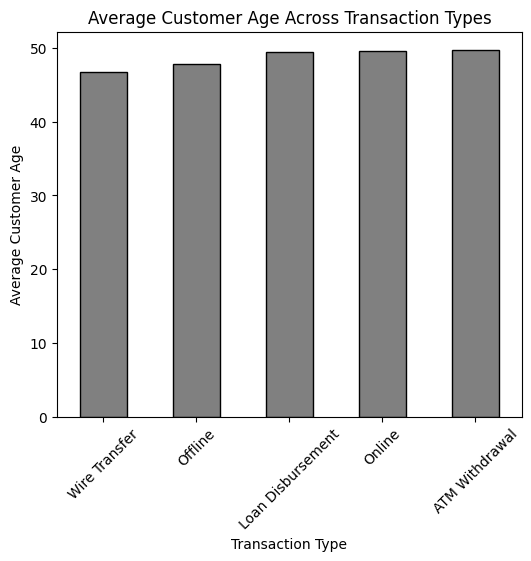

In [ ]:
age_distribution.plot(kind='bar', figsize=(6,5), color='grey', edgecolor='black')
plt.xlabel("Transaction Type")
plt.ylabel("Average Customer Age")
plt.title("Average Customer Age Across Transaction Types")
plt.xticks(rotation=45)
plt.show()

**What percentage of transactions are marked as Fraudulent?**

In [ ]:
fraud_per= (bsfi_df['Fraudulent'].mean())*100
fraud_per

np.float64(15.4)

**Do fraudulent transactions tend to have higher Risk_Scores?**

In [ ]:
higher_risk_score= bsfi_df.groupby("Transaction_Type")['Risk_Score'].mean()
higher_risk_score

,Risk_Score
Transaction_Type,
ATM Withdrawal,47.671958
Loan Disbursement,49.980583
Offline,46.995595
Online,51.456410
Wire Transfer,47.393443


**What is the relationship between Credit_Score and fraud occurrences?**

insights:Fraudulent transactions have a slightly lower average Credit Score (562.67) compared to non-fraudulent transactions (571.70).
This suggests that customers with lower Credit Scores might be at a higher risk of fraud or are more likely involved in fraudulent transactions.
However, the difference (~9 points) is small, so it may not be a strong indicator of fraud on its own.

In [ ]:
bsfi_df.groupby("Fraudulent")['Credit_Score'].mean()

,Credit_Score
Fraudulent,
0,571.696217
1,562.668831


**Are specific Issue_Types more associated with fraudulent transactions?**

In [ ]:
fraud_rate=bsfi_df.groupby("Issue_Type")['Fraudulent'].sum().sort_values()

<ipython-input-42-fdd4016fd78b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='Reds_r', edgecolor='black')


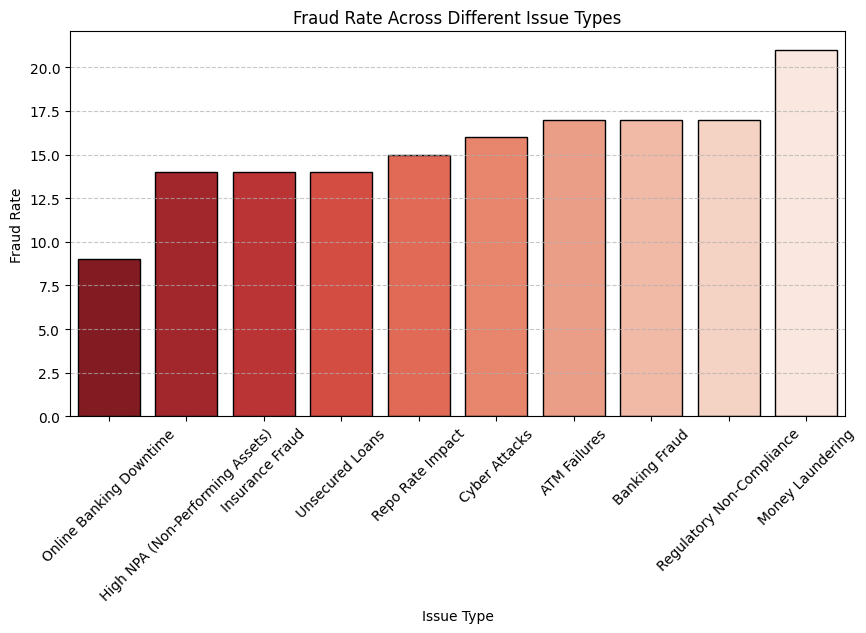

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='Reds_r', edgecolor='black')
plt.xlabel("Issue Type")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate Across Different Issue Types")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Is there a correlation between Amount and Fraudulent transactions?**

The value 0.032661 indicates a very weak positive correlation between transaction amount and fraud occurrences.Since this value is close to 0, it suggests that Amount is not strongly linked to fraud.
Fraudulent transactions occur at various amounts without a clear pattern.
insights:Since the correlation is very low (~0.03), Amount alone is not a strong predictor of fraud.
There might be other stronger factors (like Risk_Score or Credit_Score) influencing fraud.

In [ ]:
correlation= bsfi_df[['Amount','Fraudulent']].corr()
correlation

,Amount,Fraudulent
Amount,1.000000,0.032661
Fraudulent,0.032661,1.000000


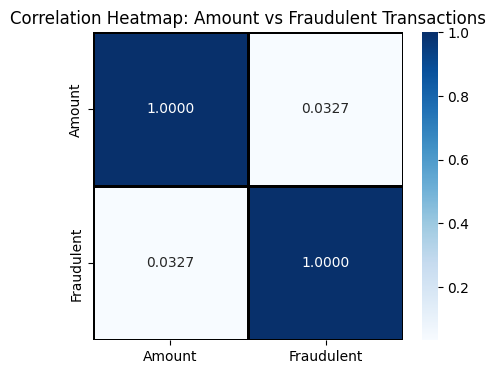

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".4f", linewidths=1, linecolor='black')
plt.title("Correlation Heatmap: Amount vs Fraudulent Transactions")
plt.show()

Dark Blue → High correlation,  
Light Blue → Low correlation


In [ ]:
bsfi_df.head(2)

,Transaction_ID,Issue_Type,Amount,Risk_Score,Fraudulent,Regulatory_Compliance,Region,Transaction_Type,Customer_Age,Credit_Score,Employment_Status,Timestamp
0,102,Repo Rate Impact,4847769.0,99,0,Non-Compliant,North,Offline,24,364,Employed,2023-01-05 05:00:00
1,983,Insurance Fraud,2091545.0,29,0,Non-Compliant,East,Loan Disbursement,20,762,Unemployed,2023-02-10 22:00:00


In [ ]:
#plt.figure(figsize=(12,6))
#sns.histplot(data=bsfi_df, x='Credit_Score', hue='Employment_Status', kde=True, bins=30)
#plt.title("Distribution of Credit Scores Across Employment Status Categories")
#plt.show()

In [ ]:
bsfi_df.head(3)

,Transaction_ID,Issue_Type,Amount,Risk_Score,Fraudulent,Regulatory_Compliance,Region,Transaction_Type,Customer_Age,Credit_Score,Employment_Status,Timestamp
0,102,Repo Rate Impact,4847769.0,99,0,Non-Compliant,North,Offline,24,364,Employed,2023-01-05 05:00:00
1,983,Insurance Fraud,2091545.0,29,0,Non-Compliant,East,Loan Disbursement,20,762,Unemployed,2023-02-10 22:00:00
2,695,Repo Rate Impact,1258949.0,66,0,Compliant,North,Loan Disbursement,33,510,Employed,2023-01-29 22:00:00


**How is Credit_Score distributed across different Employment_Status categories?**

In [ ]:
credit_score_distribution=bsfi_df.groupby('Employment_Status')['Credit_Score'].agg(['mean','median','std','count'])
credit_score_distribution

,mean,median,std,count
Employment_Status,,,,
0,600.777778,598.0,147.928405,45
Employed,566.496183,572.5,156.419528,524
Self-Employed,587.381720,580.5,159.269174,186
Student,594.111111,622.0,157.884627,45
Unemployed,552.195000,548.5,158.226944,200


**Are there particular Regions where fraud occurs more frequently?**

The South (51 cases) and North (48 cases) have the highest number of fraudulent transactions.
This suggests that fraud risk is higher in these regions.


In [ ]:
fraud_freq_in_regions= bsfi_df.groupby('Region')['Fraudulent'].sum()
fraud_freq_in_regions

,Fraudulent
Region,
0,6
East,24
North,48
South,51
West,25


**How does Employment_Status affect fraud risk?**

1️ Employed individuals have the highest fraud cases (78 cases) – Likely due to higher transaction volume and financial access.

2 Unemployed individuals show significant fraud (34 cases) – Possibly driven by financial strain, loan fraud, or benefit fraud.

3️ Self-Employed individuals (28 cases) – May be involved in business-related fraud, tax evasion, or invoice manipulation.

4 Students have the lowest fraud cases (6 cases) – Likely due to limited financial access and small transactions.

5 "0" as an Employment Status (8 cases) is likely a data issue – Needs cleaning for accurate analysis.

In [ ]:
bsfi_df.groupby('Employment_Status')['Fraudulent'].sum().sort_values()


,Fraudulent
Employment_Status,
Student,6
0,8
Self-Employed,28
Unemployed,34
Employed,78


**Regulatory Compliance & Risk What percentage of transactions comply with Regulatory_Compliance?**

Insights:

1 74.7% of transactions are compliant – Most transactions follow regulations, indicating a strong compliance framework.

2 21.4% are non-compliant – A significant portion of transactions fail regulatory checks, which could indicate risk exposure or policy gaps.

3 3.9% have "0" as a value – Likely a data quality issue (missing or incorrect values) that needs cleaning for accurate analysis.

In [ ]:
compliance_rate= (bsfi_df['Regulatory_Compliance'].value_counts(normalize=True) * 100) # for get in percenatage we hv to normalize= True
compliance_rate

,proportion
Regulatory_Compliance,
Compliant,74.7
Non-Compliant,21.4
0,3.9


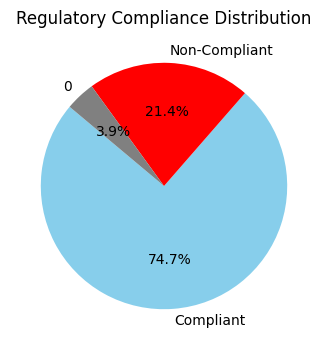

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(compliance_rate, labels=compliance_rate.index, autopct='%1.1f%%', colors=['skyblue', 'red', 'gray'], startangle=140)

# Add title
plt.title("Regulatory Compliance Distribution")

# Show the plot
plt.show()

**Do non-compliant transactions tend to have a higher Risk_Score?**

complaint has a higher risk score with 48.88 or 49 approx .

In [ ]:
bsfi_df.groupby('Regulatory_Compliance')['Risk_Score'].mean()

,Risk_Score
Regulatory_Compliance,
0,49.615385
Compliant,48.883534
Non-Compliant,47.803738


**What is the fraud rate in transactions that violate regulatory compliance?**

Insights:

20.51% of all transactions are fraudulent.
This indicates a significant fraud presence in the dataset.
Fraud Rate by Compliance Status:

Compliant Transactions: 15.13% are fraudulent.
Non-Compliant Transactions: 15.42% are fraudulent.
Insight: Surprisingly, there is only a small difference (0.29%) between compliant and non-compliant transactions in terms of fraud rates.

In [ ]:
bsfi_df.groupby("Regulatory_Compliance")['Fraudulent'].mean() * 100

,Fraudulent
Regulatory_Compliance,
0,20.512821
Compliant,15.127175
Non-Compliant,15.420561


**Temporal Patterns Are there certain Timestamp ranges when fraud is more likely to occur?**

Insights:
Peak Fraud Hours:
1 AM (23.8%) and 17-18 PM (21.9% - 19.5%) show high fraud rates.
Likely due to low monitoring at night and high transaction volume in the evening.
Low Fraud Hours:

13 PM (9.5%), 20-21 PM (9.7%) have the lowest fraud rates.
These could be low-activity periods with stricter oversight.
Early Morning Risks:

Fraud is relatively high at midnight and 6-9 AM (19% range), suggesting fraudsters target off-peak hours.

In [ ]:
bsfi_df["Timestamp"] = pd.to_datetime(bsfi_df["Timestamp"], errors="coerce")

bsfi_df["Hour"] = bsfi_df["Timestamp"].dt.hour
bsfi_df["DayOfWeek"] = bsfi_df["Timestamp"].dt.dayofweek

In [ ]:
fraud_by_hour = bsfi_df.groupby("Hour")["Fraudulent"].mean() * 100
fraud_by_hour

,Fraudulent
Hour,
0,19.047619
1,23.809524
2,16.666667
3,11.904762
4,11.904762
5,11.904762
6,19.047619
7,14.285714
8,11.904762


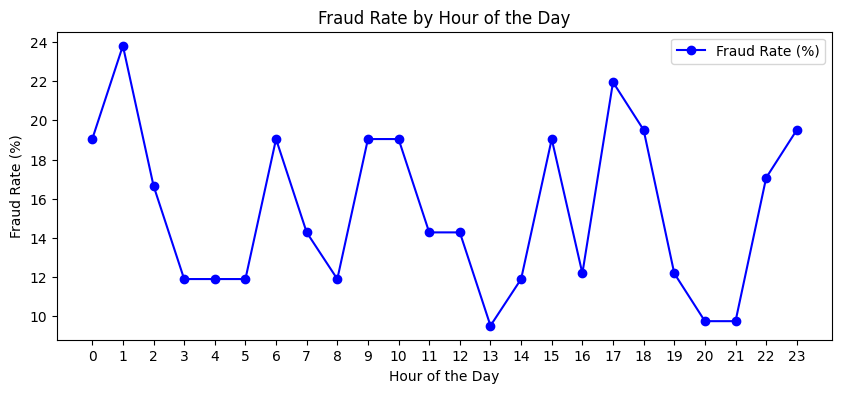

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(fraud_by_hour.index, fraud_by_hour.values, marker="o", linestyle="-", color="b", label="Fraud Rate (%)")
plt.xlabel("Hour of the Day")
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend()
plt.show()

In [ ]:
bsfi_df["DayOfWeek"] = bsfi_df["Timestamp"].dt.dayofweek
fraud_dayofweek = bsfi_df.groupby("DayOfWeek")["Fraudulent"].mean() * 100
fraud_dayofweek

,Fraudulent
DayOfWeek,
0,16.666667
1,18.055556
2,17.361111
3,9.722222
4,13.888889
5,16.176471
6,15.972222


insights :
Peak Fraud Days
Tuesday (18.05%) and Wednesday (17.36%) have the highest fraud rates.
Possible reasons: Midweek transactions may have less scrutiny compared to weekends.
Lowest Fraud Day:

Thursday (9.72%) shows the least fraud.
This may indicate stronger monitoring or lower transaction volumes.
Weekend Trends:

Saturday (16.17%) and Sunday (15.97%) have moderate fraud rates.
Fraudsters might exploit reduced staff oversight on weekends.

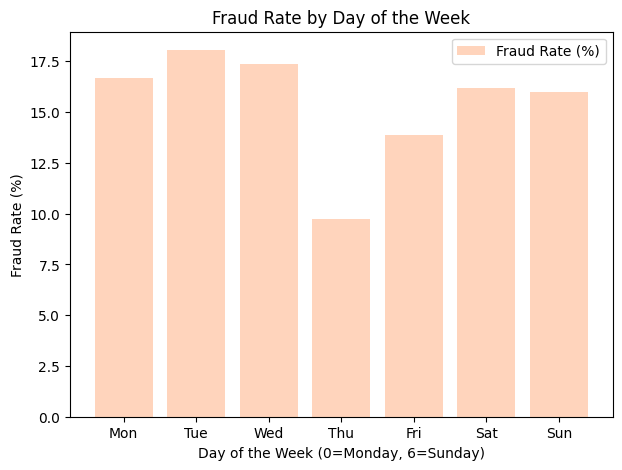

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(fraud_dayofweek.index, fraud_dayofweek.values, color="#FFC3A0", alpha=0.7, label="Fraud Rate (%)")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by Day of the Week")
plt.xticks(range(0, 7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.legend()
plt.show()

**Do transaction amounts vary significantly at different times of the day?**

Insights:variation range (coefficient of variation, CV) is 0.5537 (or 55.37%), it means:

High Variation:

A CV above 50% indicates that transaction amounts vary significantly at different times of the day.
The amounts are not consistent, with some hours having very high values and others much lower.

If CV < 10% → Low variation (values are stable).
If CV 10-50% → Moderate variation.
If CV > 50% → High variation (which is the case here).

Concludes:
Since CV = 55.37%, transaction amounts fluctuate widely across different times of the day.

In [ ]:
bsfi_df['Timestamp']= pd.to_datetime(bsfi_df['Timestamp'], errors="coerce")

In [ ]:
bsfi_df['Hour']=bsfi_df['Timestamp'].dt.hour

In [ ]:
avg_amt_per_hr= bsfi_df.groupby('Hour')['Amount'].mean()

In [ ]:
std_dev= bsfi_df.groupby('Hour')['Amount'].std()

In [ ]:
variation_at_differ_hrs= std_dev.mean()/avg_amt_per_hr.mean() # the Coefficient of Variation (CV), which measures how much transaction amounts vary compared to their average value.



In [ ]:
variation_at_differ_hrs   #variation  or cofficient of variation= Std dev/Mean

np.float64(0.5537413836053191)



4. Temporal Patterns
Are there certain Timestamp ranges when fraud is more likely to occur?
Do transaction amounts vary significantly at different times of the day?
Are there seasonal trends in Risk_Score and Fraudulent transactions?
5. Transaction Type & Customer Segmentation
Which Transaction_Type is most common?
Are certain Transaction_Types more prone to fraud?
How does Customer_Age influence the preferred Transaction_Type?
What is the average Amount per Transaction_Type?**bold text** **bold text**

**Are there seasonal trends in Risk_Score and Fraudulent transactions?**

Insights:"Seasonal Trends in Risk Score & Fraudulent Transactions" shows how Risk Score and Fraudulent Transactions change over the months.

Risk Score (Blue Line, Circles)
fraudulent data (Red line, red boxes)

Only January and February have data points.
January has a lower Risk Score than February.
No values are available for other months.
Fraudulent Transactions (Red Dashed Line, Squares)

The fraudulent transaction rate is very low (near 0) in January and February.
No fraudulent data is recorded for other months.

In [ ]:
bsfi_df['Timestamp']= pd.to_datetime(bsfi_df['Timestamp'], errors="coerce")

In [ ]:
bsfi_df["Month"] = bsfi_df["Timestamp"].dt.month

In [ ]:
monthly_trends= bsfi_df.groupby("Month")[['Fraudulent','Risk_Score']].mean()

In [ ]:
monthly_trends

,Fraudulent,Risk_Score
Month,,
1,0.154570,48.295699
2,0.152344,49.800781


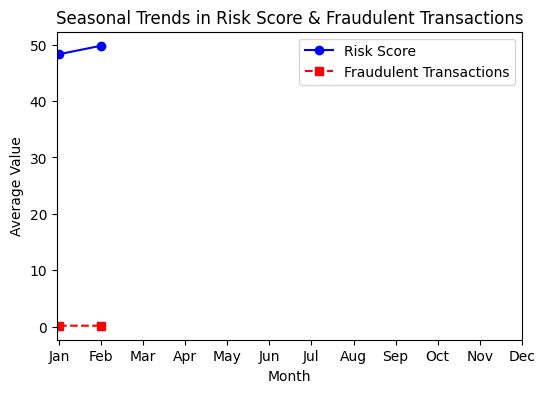

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(monthly_trends.index, monthly_trends["Risk_Score"], marker="o", linestyle="-", label="Risk Score", color="blue")
plt.plot(monthly_trends.index, monthly_trends["Fraudulent"], marker="s", linestyle="--", label="Fraudulent Transactions", color="red")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.title("Seasonal Trends in Risk Score & Fraudulent Transactions")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.show()

**Transaction Type Which Transaction_Type is most common?**




offline payment transaction type is most common with 227 counts.

In [ ]:
bsfi_df['Transaction_Type'].value_counts().sort_values(ascending= False)


,count
Transaction_Type,
Offline,227
Loan Disbursement,206
Online,195
ATM Withdrawal,189
Wire Transfer,183


**Are certain Transaction_Types more prone to fraud?**

# Insights:
Offline Transactions Have the Highest Fraud Rate (18.06%)

These might involve manual approvals, lack of digital verification, and cash transactions, making fraud easier.
Loan Disbursement Has High Fraud (16.02%)

Fraudsters may use fake documents or stolen identities to secure loans.
Wire Transfers Are High-Risk (15.85%)

Once sent, funds are hard to recover, making this a preferred method for fraud.
ATM Withdrawals Are Moderately Risky (14.29%)

Fraud here could be due to card skimming, stolen PINs, or compromised ATMs.
Online Transactions Have the Lowest Fraud (12.31%)

Likely because of fraud detection systems, 2FA, and monitoring tools.

conclude: More prone to fraud is **offline transaction.**

In [ ]:
fraud_rates = bsfi_df.groupby("Transaction_Type")["Fraudulent"].mean() * 100
fraud_rates = fraud_rates.sort_values(ascending=False)
fraud_rates

,Fraudulent
Transaction_Type,
Offline,18.061674
Loan Disbursement,16.019417
Wire Transfer,15.846995
ATM Withdrawal,14.285714
Online,12.307692


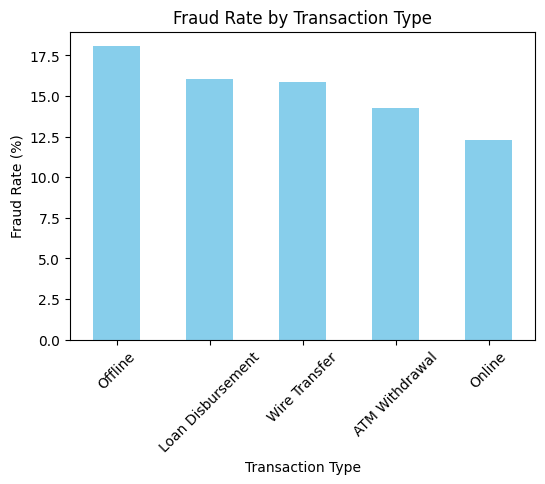

In [ ]:
plt.figure(figsize=(6, 4))
fraud_rates.plot(kind="bar", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by Transaction Type")
plt.xticks(rotation=45)
plt.show()

**What is the average Amount per Transaction_Type?**

In [ ]:
average_per_transaction= bsfi_df.groupby('Transaction_Type')['Amount'].mean()
average_per_transaction

,Amount
Transaction_Type,
ATM Withdrawal,2.447416e+06
Loan Disbursement,2.548146e+06
Offline,2.532112e+06
Online,2.495764e+06
Wire Transfer,2.637979e+06


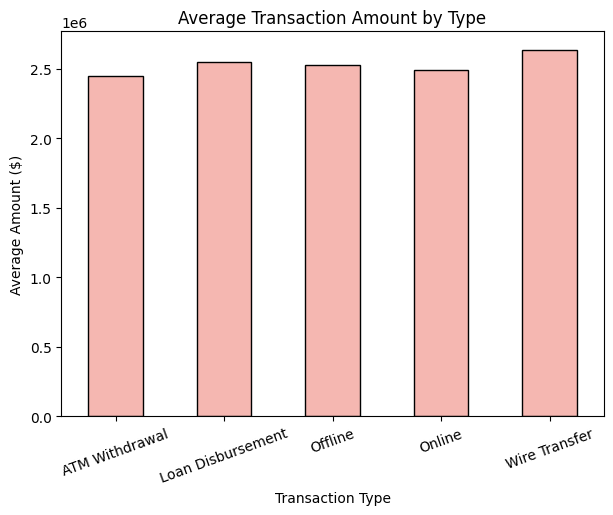

In [ ]:
plt.figure(figsize=(7, 5))
average_per_transaction.plot(kind="bar", color="#F5B7B1", edgecolor="black")
plt.xlabel("Transaction Type")
plt.ylabel("Average Amount ($)")     #colors = ["#AED6F1", "#F9E79F", "#A9DFBF", "#F5B7B1", "#D7BDE2"]
plt.title("Average Transaction Amount by Type")
plt.xticks(rotation=20)
plt.show()

##OUTLIERS  DETECTION

INSIGHTS:

1️ Risk_Score (Top Left)
The box represents the interquartile range (IQR) (middle 50% of data).
The line in the middle is the median risk score.
No extreme outliers are visible, meaning the data is well-distributed.
2️ Fraudulent (Top Right)
Since "Fraudulent" is a binary variable (0 or 1), its boxplot is different.
There is an outlier at 1, meaning there are some rare fraud cases compared to non-fraud transactions.
3️ Customer_Age (Middle Left)
The age distribution looks well spread, with no major outliers.
The median age is around the middle of the range, suggesting a normal distribution.
4️ Credit_Score (Middle Right)
The credit scores range from 300 to 800 (similar to real-world credit scoring models).
The boxplot shows a well-balanced distribution, with no significant outliers.
5️ Hour (Bottom Left)
Represents the hour of the transaction (0-23).
No visible outliers, meaning fraud is spread evenly throughout different hours.
6️ DayOfWeek (Bottom Right)
Represents the day of the week (0 = Monday, 6 = Sunday).
No extreme outliers, meaning transactions are evenly distributed across the week.

concludes:

Fraudulent transactions have clear outliers (showing rare cases).

Most variables (Risk Score, Age, Credit Score) are well-distributed.

No extreme outliers in Hour or DayOfWeek.
--------------------------------------------------------------->>>>>

1 Boxplots are usually designed for continuous data, but since "Fraudulent" has only 0 and 1, the plot appears unusual.
2️ Most values are at 0, meaning that most transactions are not fraudulent.
3️ The outlier at 1 represents the rare fraud cases, indicating that fraudulent transactions are much fewer than non-fraudulent ones.
------------------------------------------------------------------->>>>

Since fraud cases (1s) are much less frequent than normal transactions (0s), they appear as outliers in the boxplot.
The outlier does not mean a mistake—it just visually confirms that fraud is rare in the dataset.
This suggests that fraud detection models must deal with an imbalanced dataset, where fraud cases are much fewer than normal transactions.
---------------------------------------------------------->>>>>

Fraud is rare, appearing as an outlier.
Most transactions are non-fraudulent (majority of data is at 0).
Important for fraud detection models, as they need to handle the class imbalance.



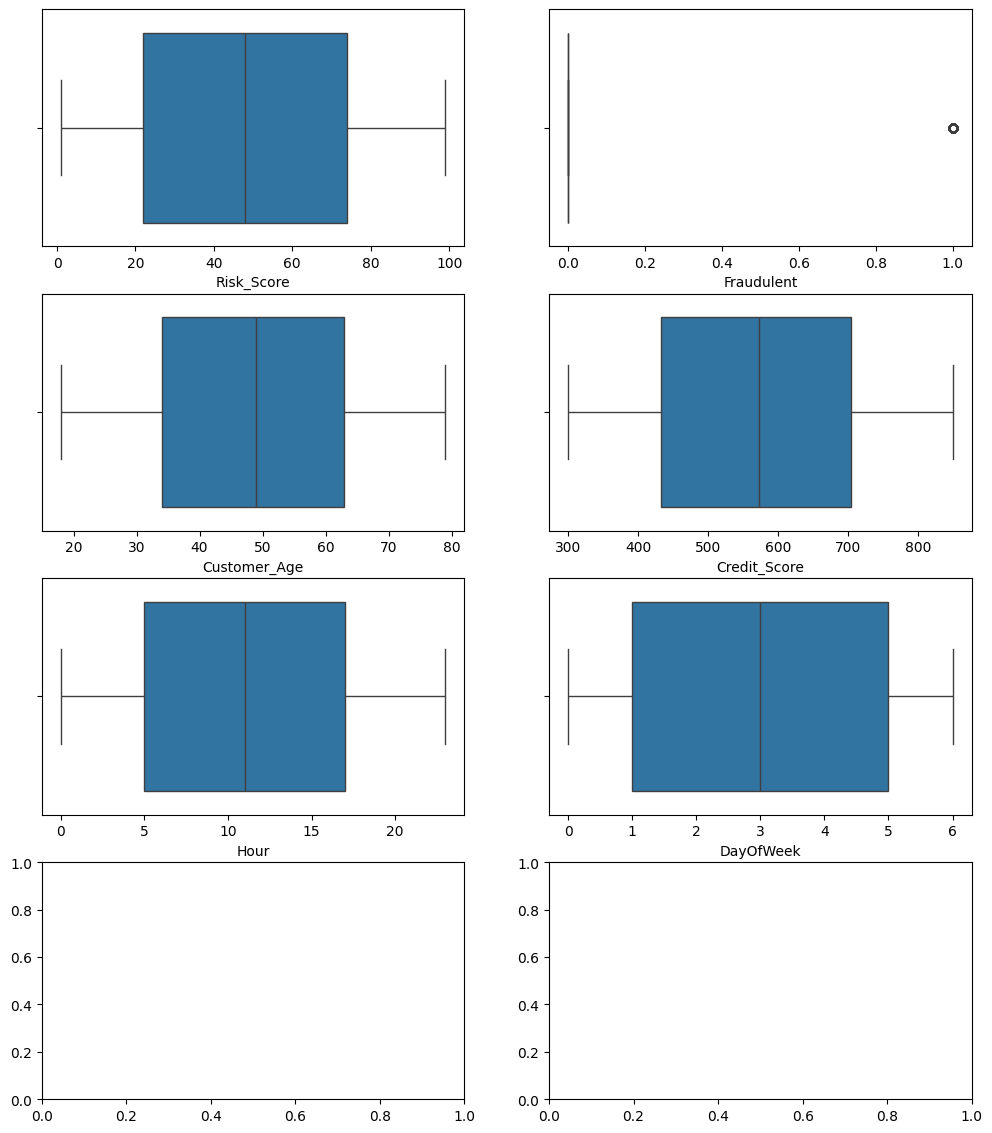

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=bsfi_df, x="Risk_Score", orient='h', ax=axis[0,0])
sns.boxplot(data=bsfi_df, x="Fraudulent", orient='h', ax=axis[0,1])
sns.boxplot(data=bsfi_df, x="Customer_Age", orient='h', ax=axis[1,0])
sns.boxplot(data=bsfi_df, x="Credit_Score", orient='h', ax=axis[1,1])
sns.boxplot(data=bsfi_df, x="Hour", orient='h', ax=axis[2,0])
sns.boxplot(data=bsfi_df, x="DayOfWeek", orient='h', ax=axis[2,1])
plt.show()

## OUTLIER HANDLING OR REMOVAL FOR Fraudulent FEATURE

This boxplot with outliers removed, showing only normal fraudulent values.

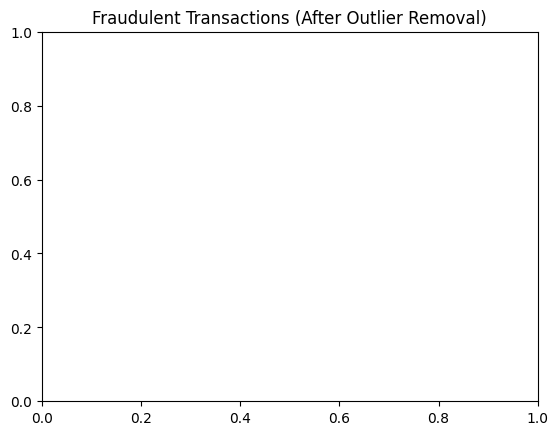

In [ ]:
#Outlier Treatment: Removing top 5% & bottom 1% of the Column Outlier values
Q3 = bsfi_df['Fraudulent'].quantile(0.75)
Q1 = bsfi_df['Fraudulent'].quantile(0.25)
IQR = Q3-Q1
bsfi_df = bsfi_df[(bsfi_df['Fraudulent'] > Q1 - 1.5*IQR) & (bsfi_df['Fraudulent'] < Q3 + 1.5*IQR)]

sns.boxplot(data=bsfi_df, x="Fraudulent", orient='h')
plt.title("Fraudulent Transactions (After Outlier Removal)")
plt.show()

In [ ]:
#q1 = bsfi_df["Fraudulent"].quantile(0.25)
#q3 = bsfi_df["Fraudulent"].quantile(0.75)
#iqr = q3 - q1
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

#df_filtered = bsfi_df[(bsfi_df["Fraudulent"] >= lower_bound) & (bsfi_df["Fraudulent"] <= upper_bound)]
#print(df_filtered.shape)  # Ensure data still exists

In [ ]:
#q1 = bsfi_df["Fraudulent"].quantile(0.25)
#q3 = bsfi_df["Fraudulent"].quantile(0.75)
#iqr = q3 - q1
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Remove Only Extreme Outliers
#df_filtered = bsfi_df[(bsfi_df["Fraudulent"] >= lower_bound) & (bsfi_df["Fraudulent"] <= upper_bound)]

# Plot Boxplot After Removing Outliers
#plt.figure(figsize=(5, 4))
#sns.boxplot(x=df_filtered["Fraudulent"], color="lightblue")
#plt.title("Fraudulent Transactions (After Outlier Removal)")
#plt.show()